<a href="https://colab.research.google.com/github/Afsoon-Ghazanfari/Customer_Churn_Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Connecting to the Google Drive and creating dataframes
from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv('/content/drive/My Drive/Customer_Churn_Prediction/train.csv')
df.head()

Mounted at /content/drive


,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


#Exploratory Data Analysis

In [3]:
df.shape

(4250, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [5]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
df.isnull().sum()
#There isn't any null data

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [7]:
df.duplicated().sum()
#There isn't any duplicate data

0

<Axes: xlabel='churn', ylabel='count'>

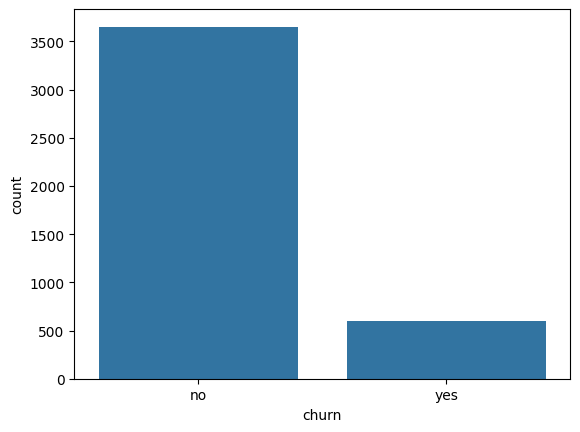

In [8]:
sns.countplot(x=df['churn'])

In [9]:
#percentage of costumer churn
churn_persentage=len(df[df['churn']=='yes'])/len(df)
churn_persentage

0.14070588235294118

**According to the countplot and churn_persentage, the dataset is unbalanced**

In [10]:
numeric_df = df.select_dtypes(include=[np.number]).columns
print(numeric_df)

Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')


<Axes: >

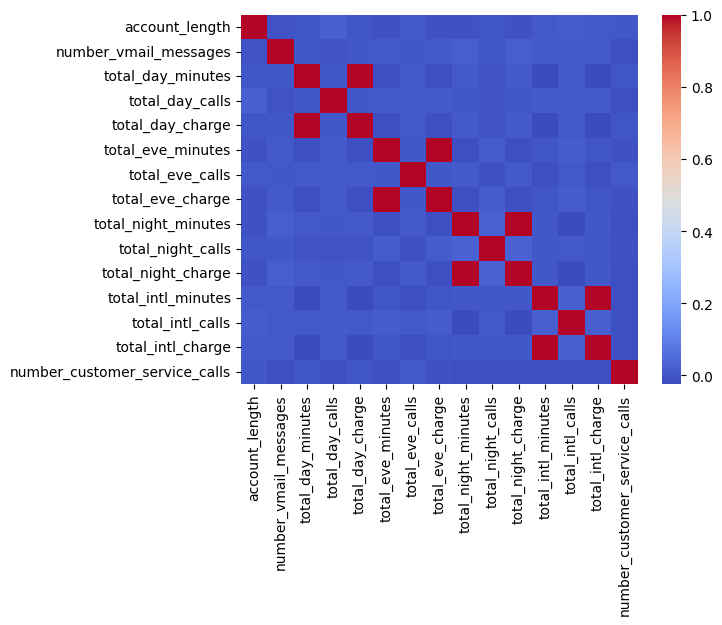

In [11]:
sns.heatmap(df[numeric_df].corr(), cmap='coolwarm')

In [12]:
#Dropping fully correlated columns as they have same information
df.drop(['total_day_minutes', 'total_eve_minutes' , 'total_night_minutes' , 'total_intl_minutes'],axis = 1, inplace = True)

<Axes: >

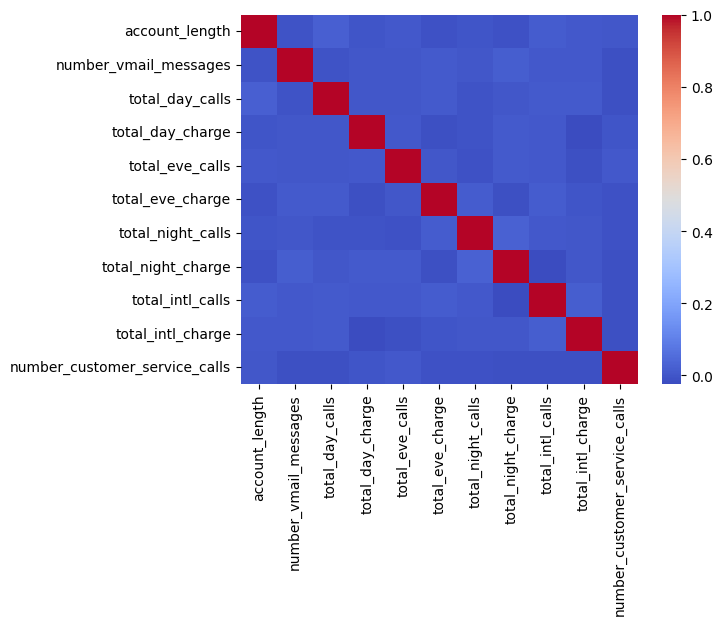

In [13]:
#Heatmap after deleting correlate columns
sns.heatmap(df[df.select_dtypes(include=[np.number]).columns].corr(), cmap='coolwarm')

# Non Numerical Data Visualization

In [14]:
non_numeric_columns=df.select_dtypes(exclude=[np.number]).columns
non_numeric_columns

Index(['state', 'area_code', 'international_plan', 'voice_mail_plan', 'churn'], dtype='object')

<Axes: xlabel='state', ylabel='count'>

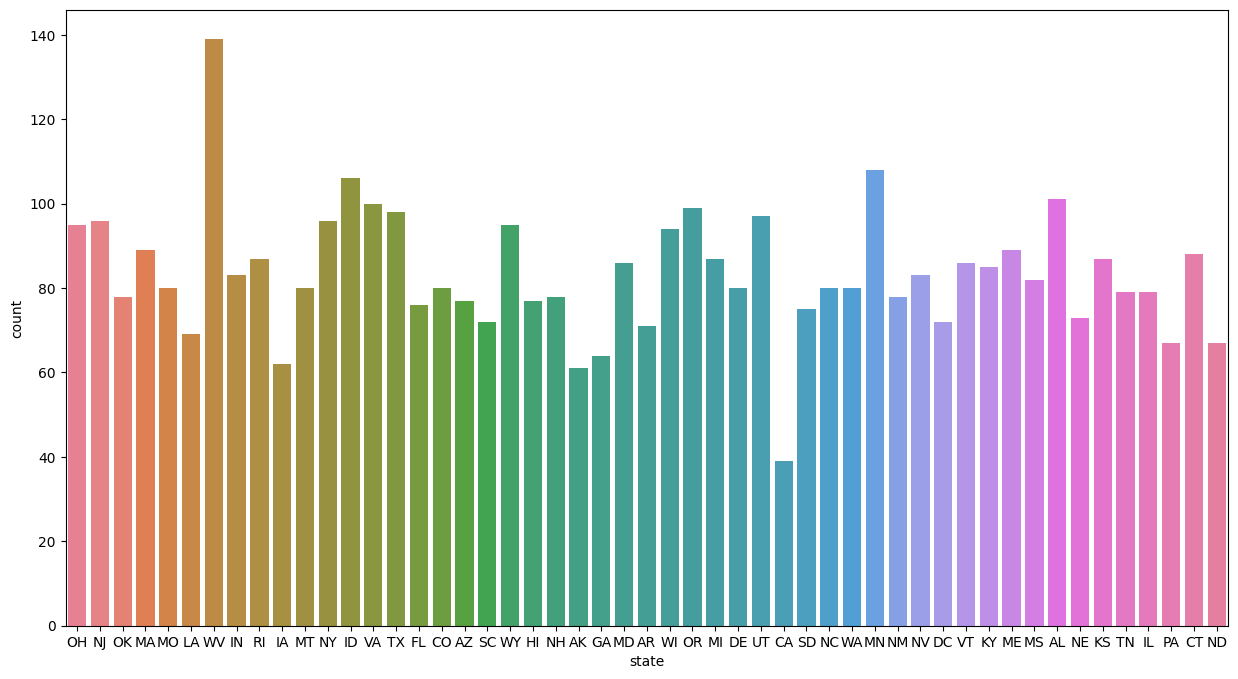

In [15]:
plt.figure(figsize= (15,8))
sns.countplot(df, x='state', hue='state', palette="husl")

In [16]:
# Function to annotate percentages on the bars
def annotate_percentages(ax):
    for p in ax.patches:
        height = p.get_height()
        if height == 0:
            continue
        total = len(df)
        percentage = f'{height / total:.1%}'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

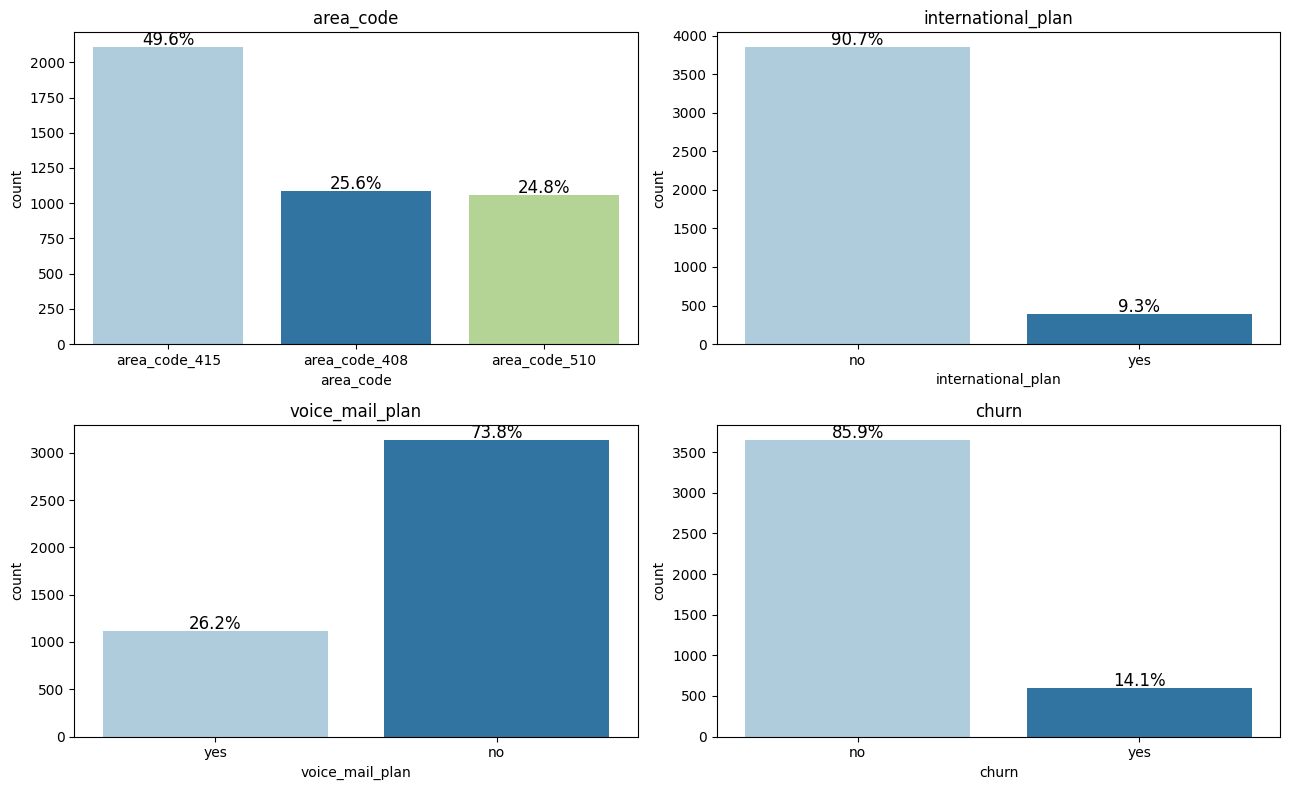

In [17]:
plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
ax1=sns.countplot(data=df, x='area_code', hue='area_code', palette="Paired")
plt.title('area_code')
annotate_percentages(ax1)

plt.subplot(2,2,2)
ax2=sns.countplot(data=df, x='international_plan', hue='international_plan', palette="Paired")
plt.title('international_plan')
annotate_percentages(ax2)

plt.subplot(2,2,3)
ax3=sns.countplot(data=df, x='voice_mail_plan', hue='voice_mail_plan', palette="Paired")
plt.title('voice_mail_plan')
annotate_percentages(ax3)

plt.subplot(2,2,4)
ax4=sns.countplot(data=df, x='churn', hue='churn', palette="Paired")
plt.title('churn')
annotate_percentages(ax4)

plt.tight_layout()
plt.show()

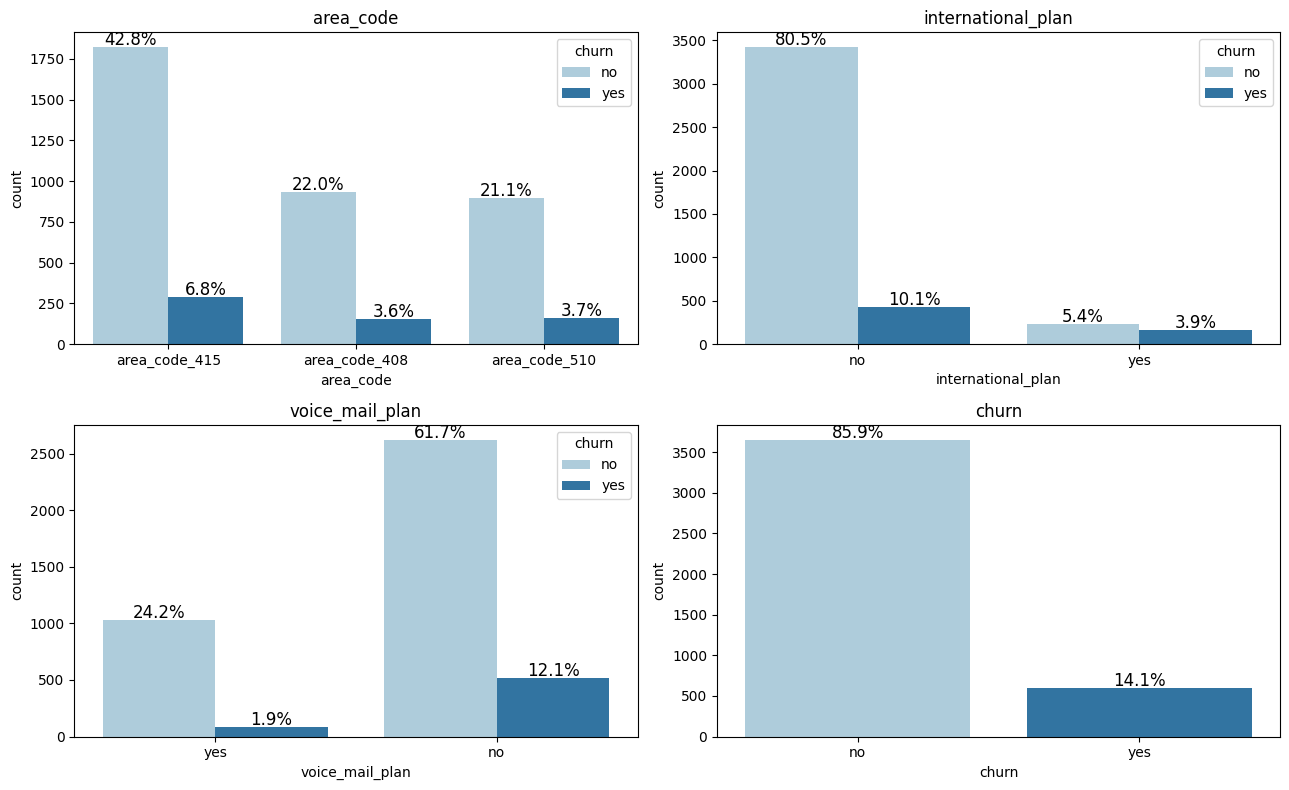

In [18]:
plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
ax1=sns.countplot(data=df, x='area_code', hue='churn', palette="Paired")
plt.title('area_code')
annotate_percentages(ax1)

plt.subplot(2,2,2)
ax2=sns.countplot(data=df, x='international_plan', hue='churn', palette="Paired")
plt.title('international_plan')
annotate_percentages(ax2)

plt.subplot(2,2,3)
ax3=sns.countplot(data=df, x='voice_mail_plan', hue='churn', palette="Paired")
plt.title('voice_mail_plan')
annotate_percentages(ax3)

plt.subplot(2,2,4)
ax4=sns.countplot(data=df, x='churn', hue='churn', palette="Paired")
plt.title('churn')
annotate_percentages(ax4)

plt.tight_layout()
plt.show()

#Numerical Data Visualization

In [19]:
new_numeric_df = df.select_dtypes(include=[np.number]).columns
print(new_numeric_df)

Index(['account_length', 'number_vmail_messages', 'total_day_calls',
       'total_day_charge', 'total_eve_calls', 'total_eve_charge',
       'total_night_calls', 'total_night_charge', 'total_intl_calls',
       'total_intl_charge', 'number_customer_service_calls'],
      dtype='object')


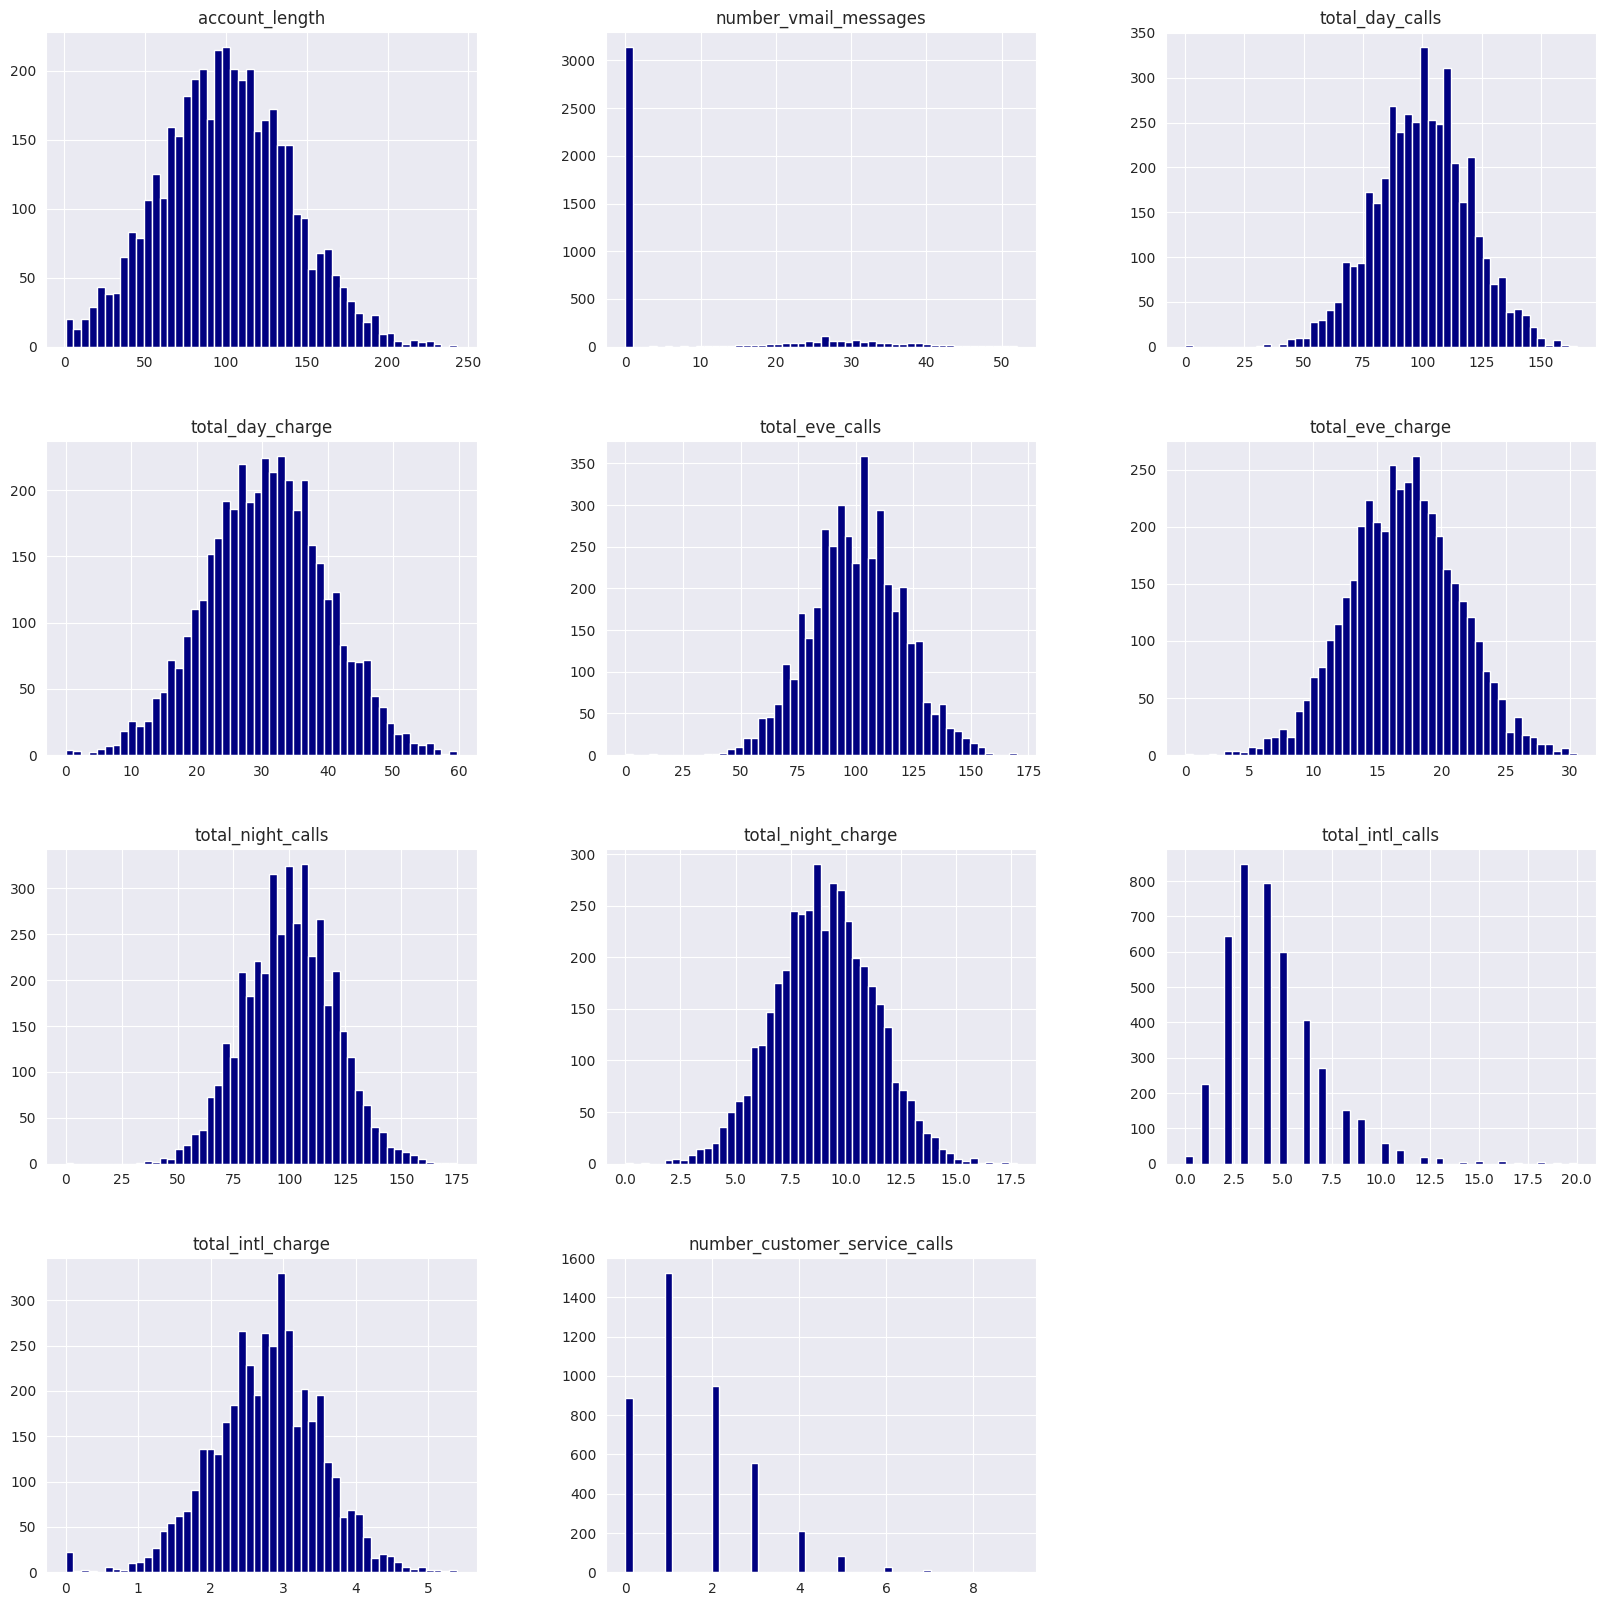

In [20]:
sns.set_style('dark')
df[new_numeric_df].hist(bins=50, figsize=(20,20), color='navy')
plt.show()

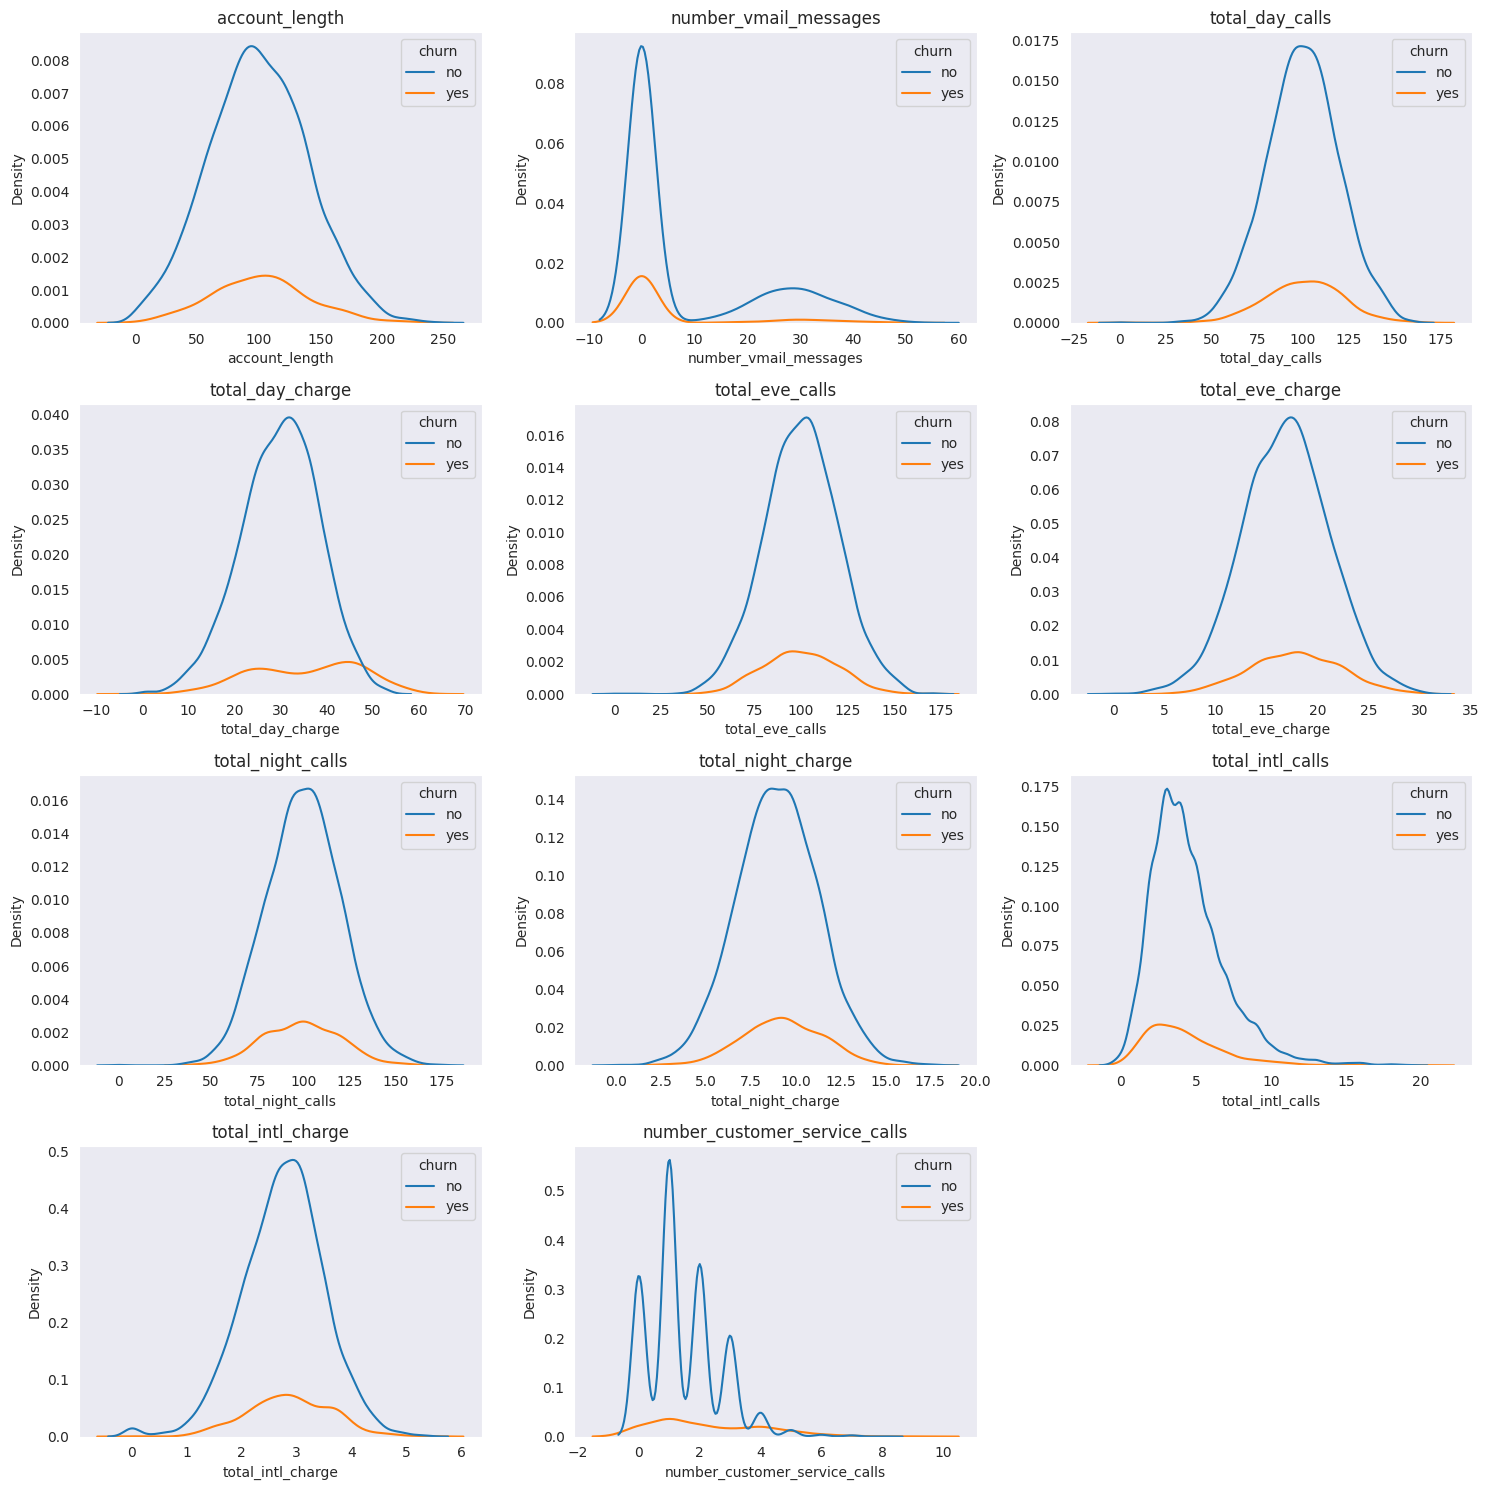

In [21]:
fig, axes=plt.subplots(4,3,figsize=(15,15))
# Flatten the 2D array of axes
axes = axes.flatten()

for i,feature in enumerate(new_numeric_df):
  sns.kdeplot(df , x = feature , hue = 'churn', ax=axes[i])
  axes[i].set_title(feature)

# Hiding any empty subplots
for j in range(len(new_numeric_df), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

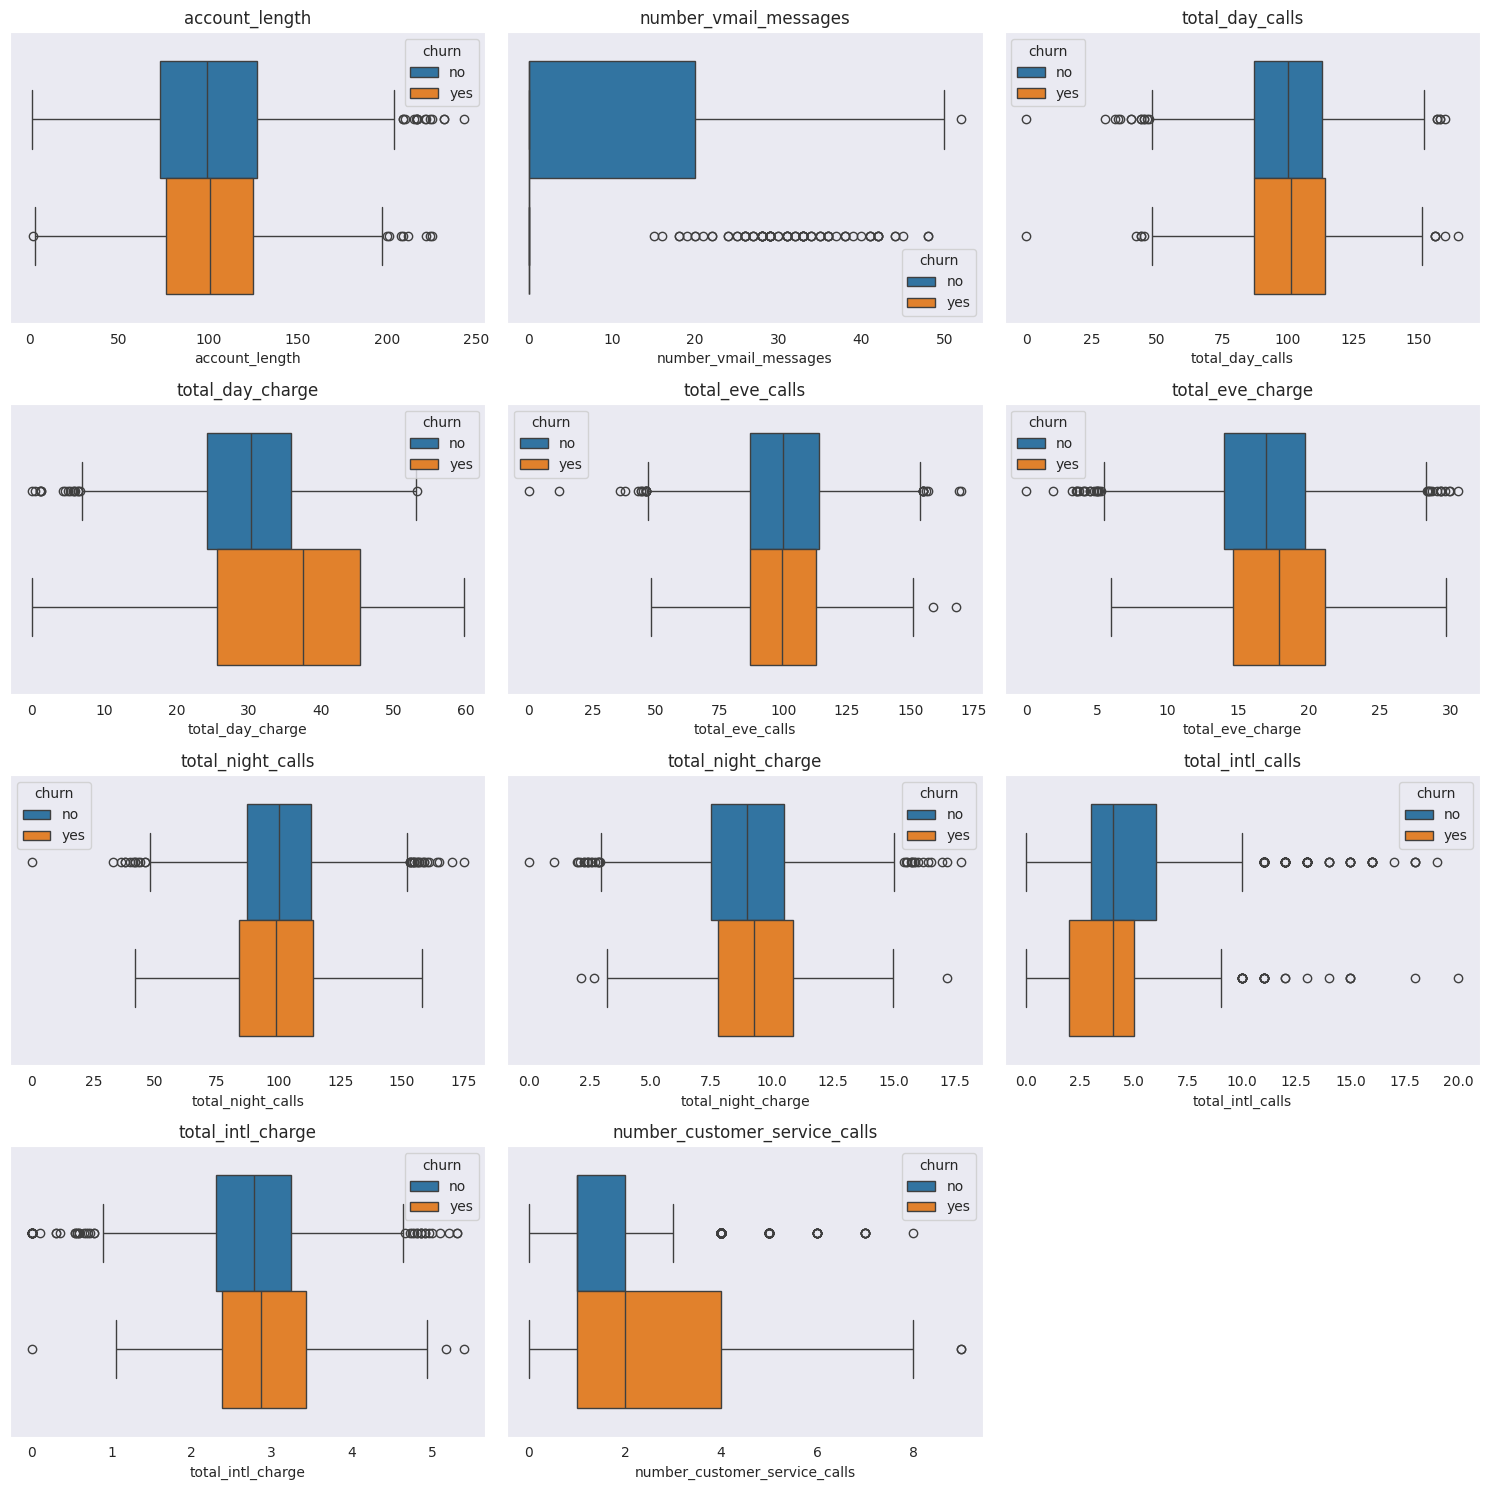

In [22]:
#Detecting outlier
fig, axes = plt.subplots(4, 3, figsize=(15,15))
# Flatten the 2D array of axes
axes = axes.flatten()

for i, feature in enumerate(new_numeric_df):
  sns.boxplot(data=df, x=feature, hue='churn', ax=axes[i])
  axes[i].set_title(feature)

# Hiding any empty subplots
for j in range(len(new_numeric_df), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**All features have outliers and they have useful information too, so they should be replaced.**

In [23]:
#Replacing outlier with meadian of it's column
for feature in new_numeric_df:
  q1=df[feature].quantile(0.25)
  q3=df[feature].quantile(0.75)
  IQR=q3-q1

  low_bound=q1-(1.5 *IQR)
  up_bound=q3+(1.5 *IQR)

  df.loc[df[feature]>up_bound, feature]=df[feature].quantile()
  df.loc[df[feature]<low_bound, feature]=df[feature].quantile()

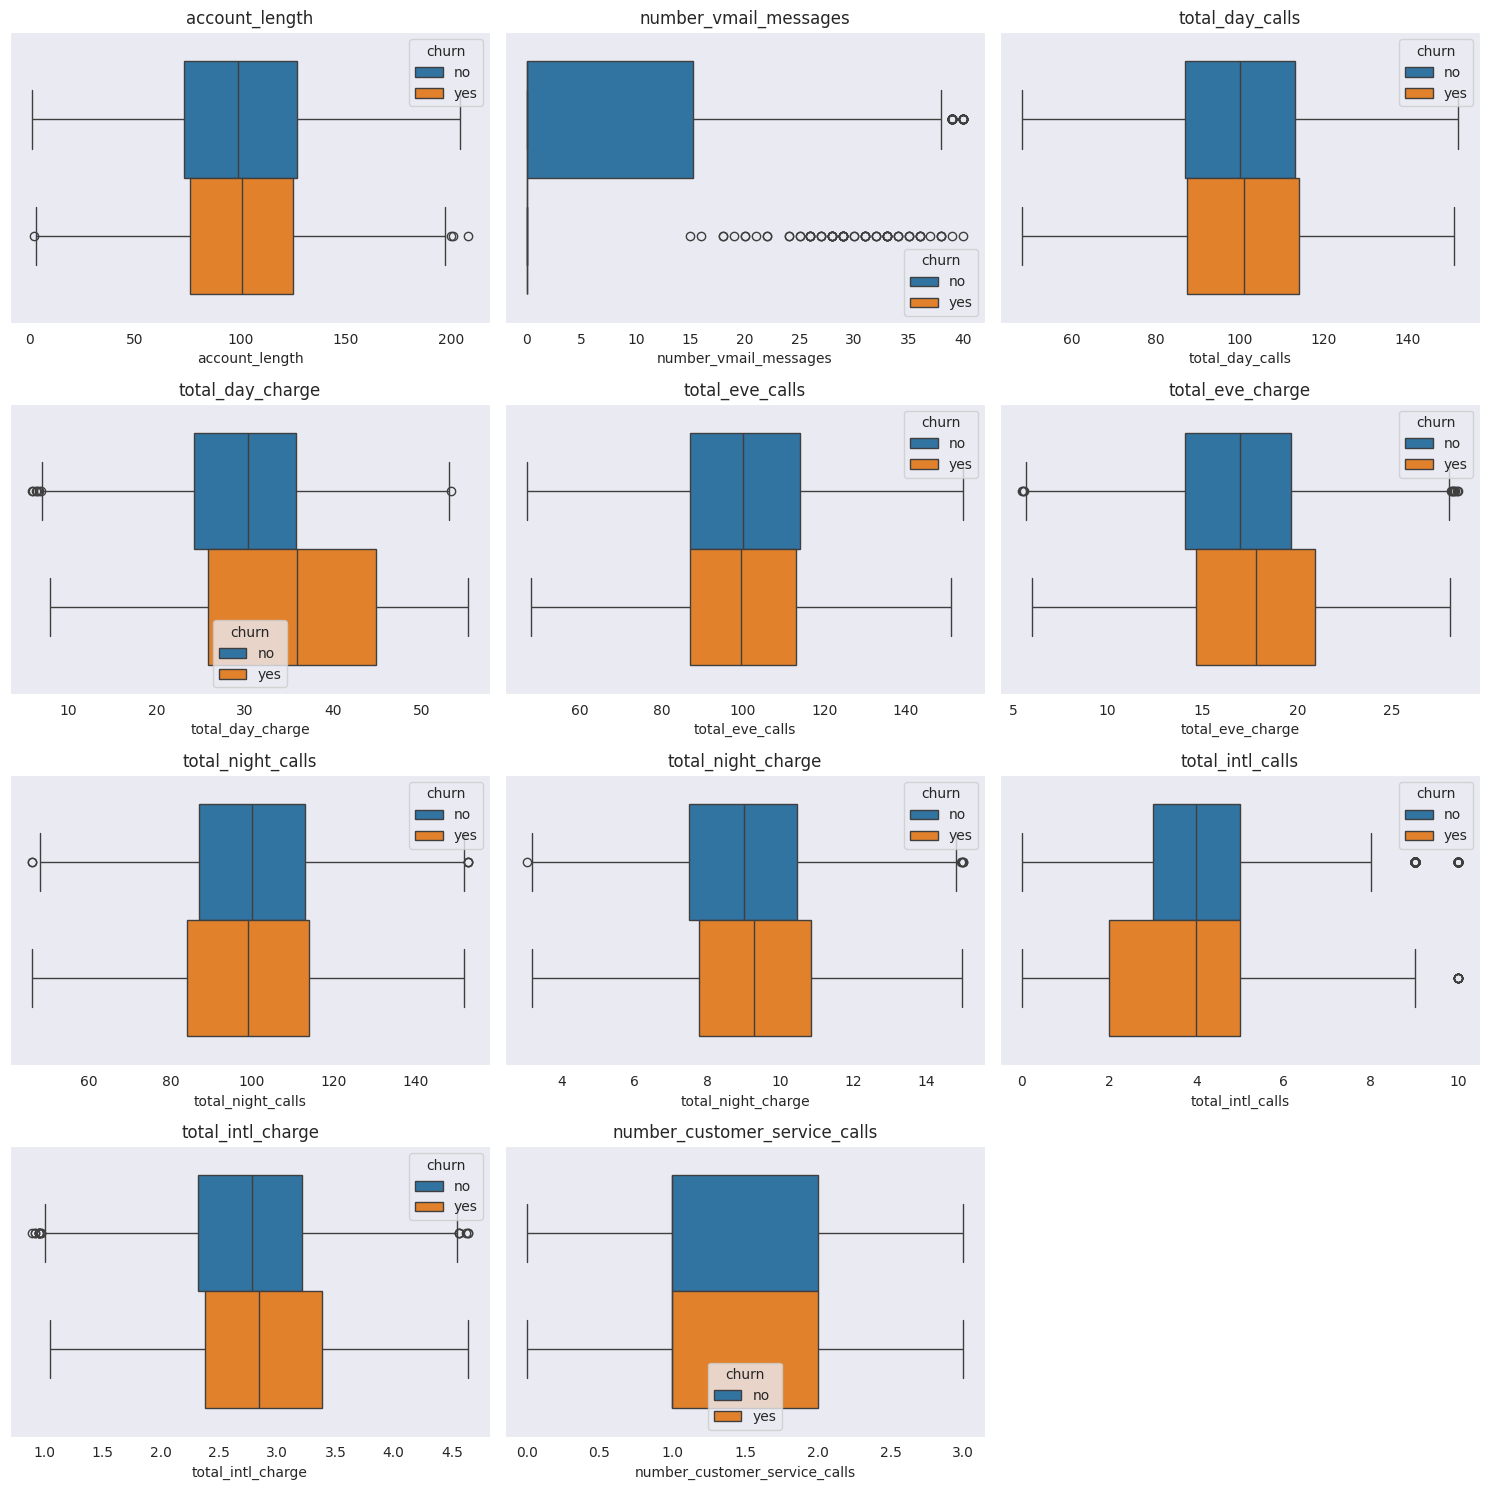

In [24]:
#Detecting outlier
fig, axes = plt.subplots(4, 3, figsize=(15,15))
# Flatten the 2D array of axes
axes = axes.flatten()

for i, feature in enumerate(new_numeric_df):
  sns.boxplot(data=df, x=feature, hue='churn', ax=axes[i])
  axes[i].set_title(feature)

# Hiding any empty subplots
for j in range(len(new_numeric_df), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

**It is obvious that there is no more outliers! and they replaced with the median.**

#Encoding data

**Because of 50 different state one-hot encoder makes lots of columns, then I decide to use BinaryEncoder to produce unique encode for each state in just 6 columns! and also we will not miss information.**

In [25]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.1 MB/s eta 0:00:00


In [26]:
#Encoding state column by BinaryEncoder
import category_encoders as ce

encoder=ce.BinaryEncoder(cols=['state'], return_df=True)
df=encoder.fit_transform(df)

df.head()

,state_0,state_1,state_2,state_3,state_4,state_5,account_length,area_code,international_plan,voice_mail_plan,...,total_day_calls,total_day_charge,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,0,0,0,0,0,1,107,area_code_415,no,yes,...,123,27.47,103,16.62,103,11.45,3,3.70,1,no
1,0,0,0,0,1,0,137,area_code_415,no,no,...,114,41.38,110,10.30,104,7.32,5,3.29,0,no
2,0,0,0,0,0,1,84,area_code_408,yes,no,...,71,50.90,88,17.06,89,8.86,7,1.78,2,no
3,0,0,0,0,1,1,75,area_code_415,yes,no,...,113,28.34,122,12.61,121,8.41,3,2.73,3,no
4,0,0,0,1,0,0,121,area_code_510,no,yes,...,88,37.09,108,17.06,118,9.57,7,2.03,3,no


In [27]:
df.area_code.unique()

array(['area_code_415', 'area_code_408', 'area_code_510'], dtype=object)

In [28]:
#Encoding area_code column by OneHotEncoder
onehotencoder=OneHotEncoder(sparse_output=False, drop='first')
encoded_array=onehotencoder.fit_transform(df[['area_code']])
encoded_df = pd.DataFrame(encoded_array, columns=onehotencoder.get_feature_names_out(['area_code']))
df=pd.concat([df, encoded_df], axis=1)
df.drop('area_code', axis=1, inplace=True)
df.head()

,state_0,state_1,state_2,state_3,state_4,state_5,account_length,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_415,area_code_area_code_510
0,0,0,0,0,0,1,107,no,yes,26,...,103,16.62,103,11.45,3,3.70,1,no,1.0,0.0
1,0,0,0,0,1,0,137,no,no,0,...,110,10.30,104,7.32,5,3.29,0,no,1.0,0.0
2,0,0,0,0,0,1,84,yes,no,0,...,88,17.06,89,8.86,7,1.78,2,no,0.0,0.0
3,0,0,0,0,1,1,75,yes,no,0,...,122,12.61,121,8.41,3,2.73,3,no,1.0,0.0
4,0,0,0,1,0,0,121,no,yes,24,...,108,17.06,118,9.57,7,2.03,3,no,0.0,1.0


In [29]:
#Encoding voice_mail_plan, international_plan, and churn by mapping method
df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0})
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].map({'yes': 1, 'no': 0})
df.head()

,state_0,state_1,state_2,state_3,state_4,state_5,account_length,international_plan,voice_mail_plan,number_vmail_messages,...,total_eve_calls,total_eve_charge,total_night_calls,total_night_charge,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code_area_code_415,area_code_area_code_510
0,0,0,0,0,0,1,107,0,1,26,...,103,16.62,103,11.45,3,3.70,1,0,1.0,0.0
1,0,0,0,0,1,0,137,0,0,0,...,110,10.30,104,7.32,5,3.29,0,0,1.0,0.0
2,0,0,0,0,0,1,84,1,0,0,...,88,17.06,89,8.86,7,1.78,2,0,0.0,0.0
3,0,0,0,0,1,1,75,1,0,0,...,122,12.61,121,8.41,3,2.73,3,0,1.0,0.0
4,0,0,0,1,0,0,121,0,1,24,...,108,17.06,118,9.57,7,2.03,3,0,0.0,1.0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state_0                        4250 non-null   int64  
 1   state_1                        4250 non-null   int64  
 2   state_2                        4250 non-null   int64  
 3   state_3                        4250 non-null   int64  
 4   state_4                        4250 non-null   int64  
 5   state_5                        4250 non-null   int64  
 6   account_length                 4250 non-null   int64  
 7   international_plan             4250 non-null   int64  
 8   voice_mail_plan                4250 non-null   int64  
 9   number_vmail_messages          4250 non-null   int64  
 10  total_day_calls                4250 non-null   int64  
 11  total_day_charge               4250 non-null   float64
 12  total_eve_calls                4250 non-null   i

#Model Development

In [31]:
X=df.drop('churn', axis=1)
y=df['churn']

In [32]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((2975, 21), (2975,), (1275, 21), (1275,))

In [34]:
#Since percentage of customer churn (class 1 data) is just 14% and I need more sample to train model so I will resampling the data.

In [35]:
# #Resampling the data
# smote=SMOTE(sampling_strategy=1, random_state=42)
# X_train_s, y_train_s=smote.fit_resample(X_train, y_train.ravel())

# print('after resampling class 0:{}'.format(sum(y_train_s == 0)))
# print('after resampling class 1:{}'.format(sum(y_train_s == 1)))

In [36]:
#Normalizig the data
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#Model1: Logistic Regression

In [37]:
model1=LogisticRegression()
model1.fit(X_train_scaled,y_train)

LogisticRegression()

#Model2: Support Vector Classifier

In [38]:
model2=SVC()
model2.fit(X_train_scaled,y_train)

SVC()

#Model3: Random Forest Classifier

In [39]:
model3=RandomForestClassifier()
model3.fit(X_train_scaled,y_train)

RandomForestClassifier()

#Model4: Gradient Boosting Classifier

In [40]:
model4=GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13)
model4.fit(X_train_scaled,y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=13, n_estimators=400)

#Model5: XGBClassifier

In [41]:
model5=XGBClassifier(max_depth=7, n_estimators=400, colsample_bytree=0.7,
                        subsample=0.8, nthread=10, learning_rate=0.01)
model5.fit(X_train_scaled,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None, nthread=10,
              num_parallel_tree=None, ...)

#Model Evaluation

In [42]:
#Creating a function to make evaluation easier
def evaluate_model(model, X, y):
  '''
  evaluate the model and returns accuracy,
  precision, recall and f1-score
  '''
  y_pred=model.predict(X)
  accuracy=accuracy_score(y_pred, y)
  precision=precision_score(y_pred, y)
  recall=recall_score(y_pred, y)
  f1=f1_score(y_pred, y)

  model_results_dict = {'accuracy': accuracy,
                          'precision': precision,
                          'recall': recall,
                          'f1-score': f1}

  return model_results_dict

In [43]:
#Evaluating and comparing models
model1_results = evaluate_model(model1, X_test_scaled, y_test)
model2_results = evaluate_model(model2, X_test_scaled, y_test)
model3_results = evaluate_model(model3, X_test_scaled, y_test)
model4_results = evaluate_model(model4, X_test_scaled, y_test)
model5_results = evaluate_model(model5, X_test_scaled, y_test)

total_results = pd.DataFrame({'Logistic Regression Model':model1_results,
                             'Support Vector Classifier Model':model2_results,
                             'Random Forest Classifier Model':model3_results,
                             'Gradient Boosting Classifier Model':model4_results,
                             'XGBClassifier Model':model5_results}).transpose()

total_results.sort_values(ascending=False, by='accuracy')

,accuracy,precision,recall,f1-score
XGBClassifier Model,0.924706,0.512821,0.990099,0.675676
Random Forest Classifier Model,0.912941,0.451282,0.956522,0.613240
Gradient Boosting Classifier Model,0.905882,0.528205,0.786260,0.631902
Support Vector Classifier Model,0.879216,0.225641,0.936170,0.363636
Logistic Regression Model,0.861176,0.158974,0.704545,0.259414


In [44]:
y_pred5=model5.predict(X_test_scaled)

Text(0.5, 23.52222222222222, 'Predicted class')

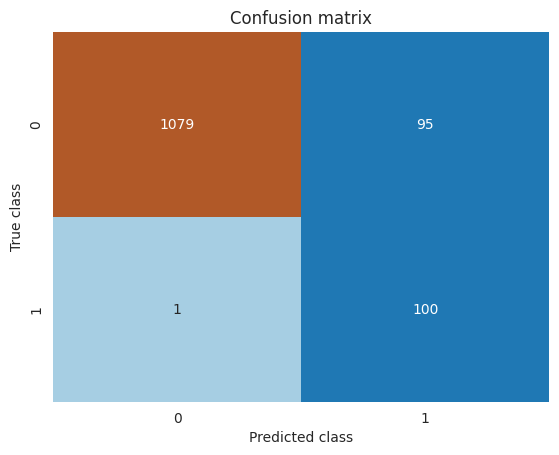

In [51]:
#Ploting Confusion matrix for XGBClassifier Model
sns.heatmap(confusion_matrix(y_pred5,y_test),cmap='Paired',annot=True,cbar=False, fmt='d')
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
# fmt='d' is used to change numbers from exponential notation to normal number